In [ ]:
# from google.colab import files
# files.upload()

Saving diabetes.csv to diabetes (2).csv


{'diabetes (2).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.25

IMPORTING THE DEPENDENCIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


DATA COLLECTION AND ANALYSIS

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [ ]:
#checking number of rows and coluumns
df.shape

(768, 9)

In [ ]:
#getting the statistical measures of data
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['outcome'].value_counts()

,count
outcome,
0,500
1,268


In [ ]:
# 0 => non disbetic people
# 1 =>  disbetic people

df.groupby('outcome').mean()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
#seprate the data and labels
X = df.drop(columns = 'outcome', axis = 1)  # X have all columns except 'outcome'
y = df['outcome']   # y have data of outcome

In [ ]:
print(X)

     pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     diabetespedigreefunction  age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64


DATA STANDERIZATION

In [ ]:
ss = StandardScaler()
s_X = ss.fit_transform(X)
s_X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
X = s_X
y = df['outcome']

In [ ]:
print(X,y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64


train test split model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 2)
# stratify => value 1 or 0
# random 2 => data is spillited in same way

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


TRAINING THE MODEL

In [ ]:
model = svm.SVC(kernel = 'linear')

In [ ]:
#training the support vector machine classifier
model.fit(X_train, Y_train)

SVC(kernel='linear')

MODEL EVALUATION

In [ ]:
X_train_prediction = model.predict(X_train)
accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of training data : ', accuracy)
# is acc sore> 75 its good

Accuracy score of training data :  0.7866449511400652


In [ ]:
 X_test_prediction = model.predict(X_test)
accuracy_test = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of training data : ', accuracy_test)
# is acc sore> 75 its good

Accuracy score of training data :  0.7727272727272727


In [ ]:
# data = [8,99,84,0,0,35.4,0.388,50]
data = [4,110,92,0,0,37.6,0.191,30]

adata = np.asarray(data)
sdata = adata.reshape(1,-1)

s_data = ss.transform(sdata)
print(s_data)

pred = model.predict(s_data)
print(pred)

if (pred[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


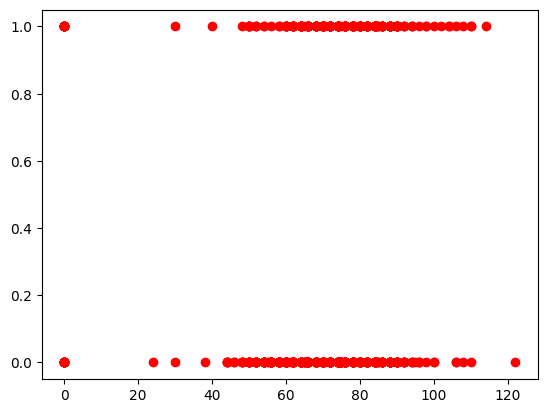

In [ ]:

plt.scatter(df['bloodpressure'],y, color='red')
# plt.plot(df['bloodpressure'],pred, color='red')
# plt.scatter(df['diabetespedigreefunction'],y, color='PINK')
# plt.scatter(df['glucose'],y, color='green')
# plt.scatter(df['skinthickness'],y, color='blue')
# plt.scatter(df['insulin'],y, color='black')
# plt.scatter(df['insulin'],df['bloodpressure'])
# plt.plot(,y)
# plt.plot()
plt.show()

In [ ]:
df.columns.str.capitalize()

In [ ]:

print('FILL ALL THE DATA ACCURATE TO PREDECT')
preg = float(input("Enter Your Pregnancies: "))
glu = float(input("Enter Your Glucose: "))
bp = float(input("Enter Your Bloodpressure: "))
skinthick = float(input("Enter Your Skinthickness: "))
insu = float(input("Enter Your Insulin: "))
bmi = float(input("Enter Your Bmi: "))
dpf = float(input("Enter Your Diabetespedigreefunction: "))
age = float(input("Enter Your Age: "))

input_data = (preg,glu,bp,skinthick,insu,bmi,dpf,age)
input_data_array = np.asarray(input_data)
final_input_data_array = input_data_array.reshape(1,-1)

standered_data = ss.transform(final_input_data_array)

input_data_prediction = model.predict(standered_data)
print(input_data_prediction)


if (input_data_prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


FILL ALL THE DATA ACCURATE TO PREDECT
Enter Your Pregnancies: 10
Enter Your Glucose: 101
Enter Your Bloodpressure: 76
Enter Your Skinthickness: 48
Enter Your Insulin: 180
Enter Your Bmi: 32.9
Enter Your Diabetespedigreefunction: 0.171
Enter Your Age: 63
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1, 154]

In [ ]:
# print(accuracy_score(input_data_prediction,y))

df.columns = df.columns.str.capitalize()
df.columns

Index(['Pregnancies', 'Glucose', 'Bloodpressure', 'Skinthickness', 'Insulin',
       'Bmi', 'Diabetespedigreefunction', 'Age', 'Outcome'],
      dtype='object')

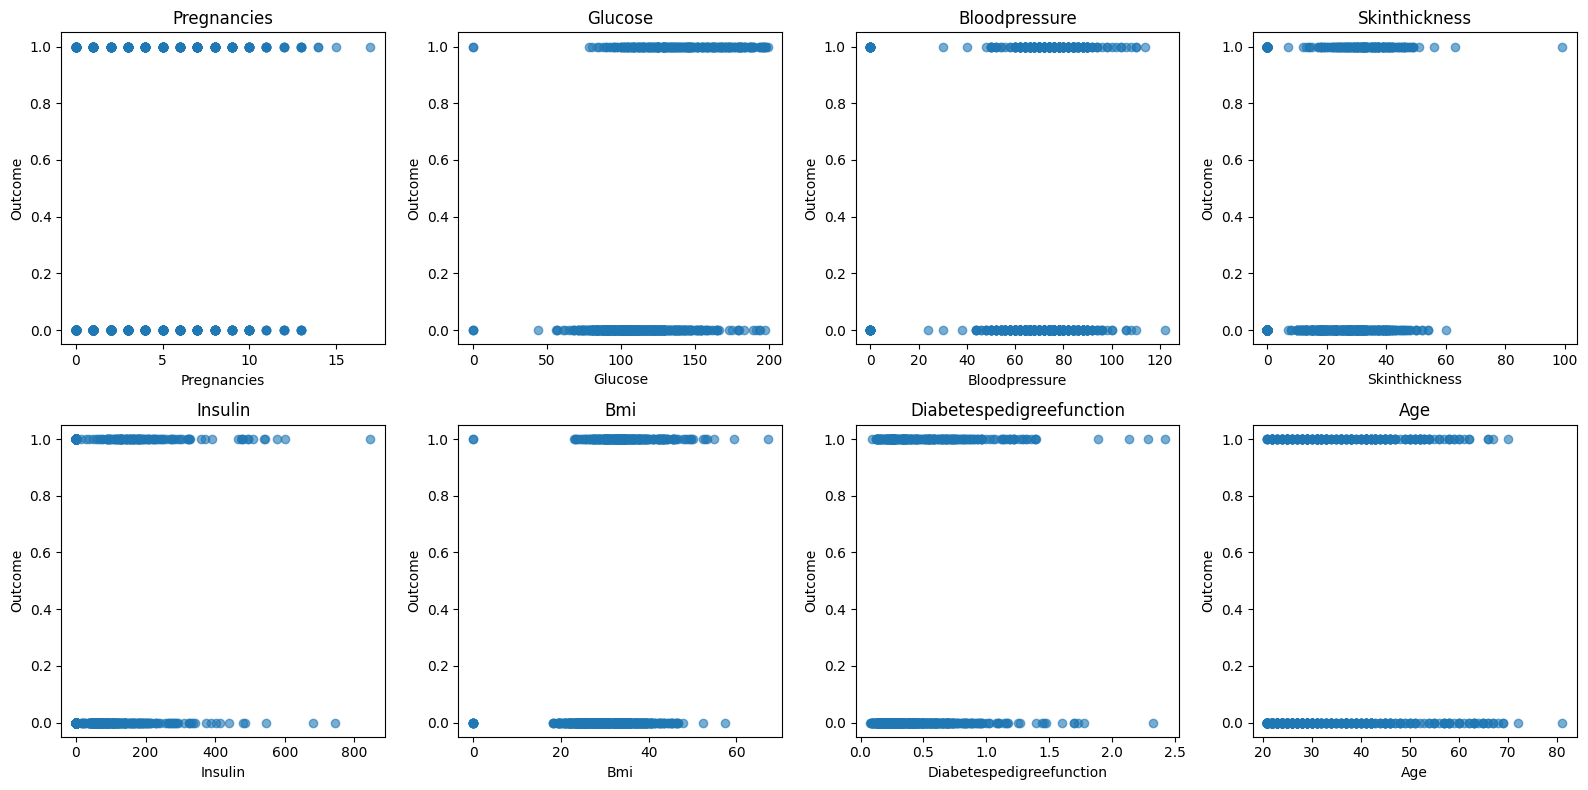

In [ ]:
features = ['Pregnancies', 'Glucose', 'Bloodpressure', 'Skinthickness',
            'Insulin', 'Bmi', 'Diabetespedigreefunction', 'Age']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()  # Flatten the 2D array of axes to 1D for easy looping

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['Outcome'], alpha=0.6)
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Outcome')

plt.tight_layout()
plt.show()